In [1]:
import pandas as pd
import psaw
from plotnine import *

In [2]:
api = psaw.PushshiftAPI()

### Download all comments containing the phrase 'Texas is back' in r/CFB

In [3]:
gen = api.search_comments(q='"texas is back"', subreddit='cfb')

max_response = 1000000

comment_list = []

for c in gen:
    comment_list.append(c)
    
    if len(comment_list) % 1000 == 0:
        print(len(comment_list))
    
    if len(comment_list) >  max_response:
        break
    

1000
2000
3000
4000


## Parse the list of comments to store them in a form more usable by pandas

In [4]:
comment_dict = {'flair': [], 'time': [], 'is_game_thread': [], 
                'author': [], 'score': [], 'link': [], 'text': []}

for comment in comment_list:
    flair = 'None'
    if comment.author_flair_text is not None:
        if len(comment.author_flair_text.split(':')) > 1:
            flair = comment.author_flair_text.split(':')[1]

    time = comment.created_utc
    author = comment.author
    score = comment.score

    if not hasattr(comment, 'permalink'):
        comment_dict['is_game_thread'].append(None)
        comment_dict['link'].append(None)
    else:
        if 'game_thread' in comment.permalink:
            comment_dict['is_game_thread'].append(True)
        else:
            comment_dict['is_game_thread'].append(False)
        comment_dict['link'].append(comment.permalink)

    comment_dict['flair'].append(flair)
    comment_dict['time'].append(time)
    comment_dict['author'].append(author)
    comment_dict['score'].append(score)
    comment_dict['text'].append(comment.body)

# Remove numbers from alt flairs
for i in range(len(comment_dict['flair'])):
    comment_dict['flair'][i] = comment_dict['flair'][i].rstrip('0123456789')
    
comment_df = pd.DataFrame.from_dict(comment_dict)

In [5]:
comment_df.head()

,flair,time,is_game_thread,author,score,link,text
0,oklahoma,1575680846,False,SoonerGeologist,1,/r/CFB/comments/e76h2c/oklahoma_is_in_search_o...,We use recycled Texas is back billboards.
1,notredame,1575557778,False,mbrogan4,1,/r/CFB/comments/e515s2/coaching_carousel_threa...,"I do enjoy also beating Texas, but I think we ..."
2,oregon,1575474050,False,Graduation2017,1,/r/CFB/comments/e5zrx5/how_joe_burrow_won_over...,I'm amazed at how Georgia has recently managed...
3,texas,1575454685,False,Allaboutfootball23,1,/r/CFB/comments/e5vedj/klatt_expect_usc_to_kee...,Yes yes. I have said that before. 7-10 years a...
4,georgia,1575449573,False,mightymagikarp7,1,/r/CFB/comments/e5wen7/texas_qb_sam_ehlinger_t...,**Texas is back!** ^(to being average)


In [6]:
# Convert seconds since 1970 to something readable
comment_df['time'] = pd.to_datetime(comment_df['time'], unit='s')

In [7]:
comment_df.head()

,flair,time,is_game_thread,author,score,link,text
0,oklahoma,2019-12-07 01:07:26,False,SoonerGeologist,1,/r/CFB/comments/e76h2c/oklahoma_is_in_search_o...,We use recycled Texas is back billboards.
1,notredame,2019-12-05 14:56:18,False,mbrogan4,1,/r/CFB/comments/e515s2/coaching_carousel_threa...,"I do enjoy also beating Texas, but I think we ..."
2,oregon,2019-12-04 15:40:50,False,Graduation2017,1,/r/CFB/comments/e5zrx5/how_joe_burrow_won_over...,I'm amazed at how Georgia has recently managed...
3,texas,2019-12-04 10:18:05,False,Allaboutfootball23,1,/r/CFB/comments/e5vedj/klatt_expect_usc_to_kee...,Yes yes. I have said that before. 7-10 years a...
4,georgia,2019-12-04 08:52:53,False,mightymagikarp7,1,/r/CFB/comments/e5wen7/texas_qb_sam_ehlinger_t...,**Texas is back!** ^(to being average)


## Create visualizations

In [8]:
comment_df.sort_values(by='score', ascending=False)

,flair,time,is_game_thread,author,score,link,text
1893,sandiego,2018-09-22 23:59:11,True,bears2267,2278,/r/CFB/comments/9i4976/postgame_thread_texas_d...,Texas is:\n\n~~Back~~\n\n~~Not back~~\n\nWeird
2008,oklahomastate,2018-09-16 04:00:20,True,ratattack97,1993,/r/CFB/comments/9g7r0p/postgame_thread_texas_d...,Texas is:\n\n❌ ~~back~~\n\n❌ ~~not back~~\n\n❌...
1548,ucf,2018-10-06 19:43:35,True,TEFL_job_seeker,1295,/r/CFB/comments/9lyuw8/postgame_thread_texas_d...,This high score unlocks the achievement:\n\nTE...
1879,texas,2018-09-22 23:59:46,True,adamjm99,1290,/r/CFB/comments/9i4976/postgame_thread_texas_d...,Texas is: \n⚪️ Back \n⚪️ Not Back \n✅ Not b...
1597,auburn,2018-10-06 19:42:14,True,gibby67,1210,/r/CFB/comments/9lyuw8/postgame_thread_texas_d...,"I made the mistake of saying ""Texas is back"" i..."
...,...,...,...,...,...,...,...
3936,None,2017-06-05 22:40:34,None,kchrystie5,-27,None,Wow- another big time name commits to Texas. H...
669,georgia,2019-06-20 14:24:50,False,WashedUpUGAGolfer,-31,/r/CFB/comments/c2wli8/texas_football_2020_rec...,But Texas is back?!?!
8,None,2019-12-01 23:45:10,False,treyarchisking,-31,/r/CFB/comments/e4pwjt/2020_4_cb_ethan_pouncey...,"Yeah I wouldn’t worry too much , Texas is BACK..."
2679,None,2018-08-10 00:04:22,False,CookLove,-31,/r/CFB/comments/961noi/2018_coaches_poll_top_1...,*Texas posts a 9-3 record this season*\n\n“I’m...


In [9]:
print(comment_df.iloc[1893, :].link)

/r/CFB/comments/9i4976/postgame_thread_texas_defeats_tcu_3116/e6gp06g/


### Frequency of 'Texas is back' comments over time

In [11]:
new_comments_df = comment_df[comment_df['time'] > '2016-1-01 00:00:00']

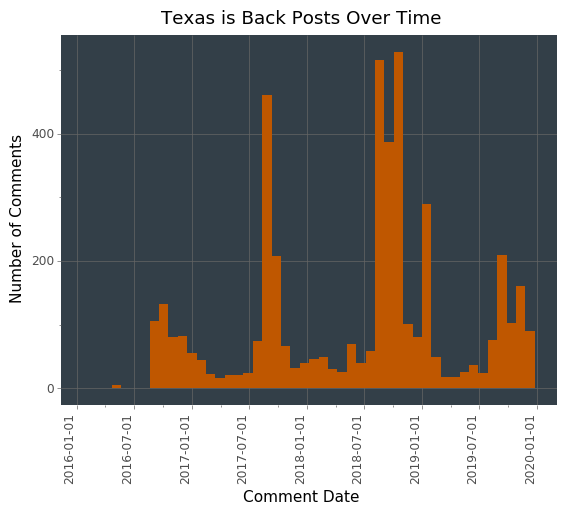

<ggplot: (8772498709239)>

In [12]:
(ggplot(new_comments_df, aes(x='time')) + 
    geom_histogram(fill='#bf5700', bins=48) + 
    ggtitle('Texas is Back Posts Over Time') +
    ylab('Number of Comments') +
    xlab('Comment Date') +
    theme_dark() +
    theme(axis_text_x=element_text(rotation=90, hjust=1),
          panel_grid_minor=element_blank(),
          panel_background=element_rect(fill='#333f48', color='None')))

### Are 'Texas is back' posts mainly in game threads?

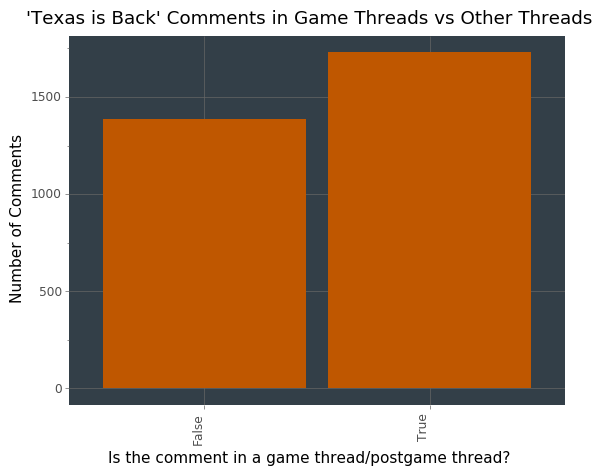

<ggplot: (8772496507883)>

In [13]:
(ggplot(comment_df.dropna(), aes(x='is_game_thread')) +
    geom_bar(fill='#bf5700') +
    ggtitle("'Texas is Back' Comments in Game Threads vs Other Threads") +
    ylab('Number of Comments') +
    xlab('Is the comment in a game thread/postgame thread?') +
    theme_dark() +
    theme(axis_text_x=element_text(rotation=90, hjust=1),
          panel_grid_minor=element_blank(),
          panel_background=element_rect(fill='#333f48', color='None'))
)

### Are some users particularly attached to 'Texas is back'?

In [14]:
comment_df['author'].value_counts().to_frame().head(5)

,author
TheNinoOfEl,27
eye_can_see_you,13
TrojanMuffin,13
[deleted],13
laela_says,11


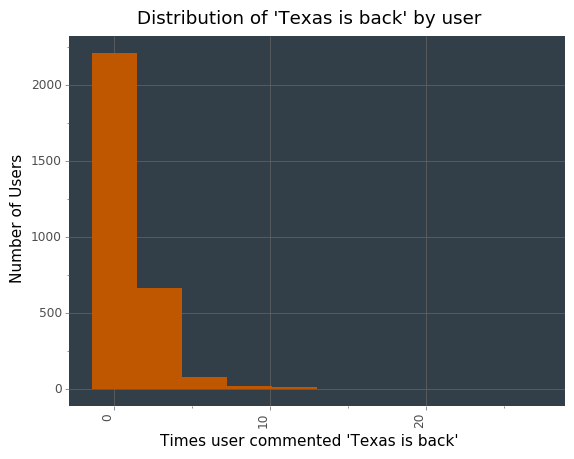

<ggplot: (8772496509805)>

In [15]:
(ggplot(comment_df['author'].value_counts().to_frame(), aes(x='author')) +
    geom_histogram(fill='#BF5700', bins=10) + 
    ggtitle("Distribution of 'Texas is back' by user") +
    ylab('Number of Users') +
    xlab("Times user commented 'Texas is back'") +
    theme_dark() +
    theme(axis_text_x=element_text(rotation=90, hjust=1),
          panel_grid_minor=element_blank(),
          panel_background=element_rect(fill='#333f48', color='None'))
)

### Which team's fans love the meme the most?

In [16]:
comment_df['flair'].value_counts().to_frame().head(10)

,flair
None,1975
texas,380
oklahoma,211
texasam,167
alabama,146
ohiostate,144
michigan,99
georgia,95
notredame,61
oklahomastate,57
